## The projects seeks to provide insight into the dataset using the CRISP-DM processes. 
#### For more information on visit the project ReadMe file and the Blog Post on Medium
1. How does user from each location respond to the different review categories and which rooms were visited the most?
2. In what way did the reviews affect the revenue of the company?
3. What policy affected the choice of review on the site and in which was do they visitors respond to the reviews.

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.ticker import MultipleLocator
import seaborn as sns
%matplotlib inline

df_reviews = pd.read_csv('./reviews.csv')
df_reviews.head()
#df_reviews.shape

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
#get the listing dataset 
df_listings = pd.read_csv('./listings.csv')
df_listings.drop_duplicates(inplace=True)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
#Get the the data for the Calendars
df_calendars = pd.read_csv('./calendar.csv')
df_price = df_calendars[df_calendars['price'].isnull() == False]
df_price.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [104]:
 df_listings.columns
#df_listings.shape

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

# Questions
### 1. How does user from each location respond to the different review categories and which rooms were visited the most?
### 2. In what way did the reviews affect the revenue of the company?

### 3. What policy affected the choice of review on the site and in which was do they visitors respond to the reviews.

# 1. How does user from each location respond to the different review categories and which rooms were visited the most?

In [6]:
#Merge the listing and reviews dataset
df_merge = pd.merge(df_listings,df_reviews,left_on='id',right_on='listing_id')
df_merge.drop_duplicates(inplace=True)
df_merge.head()

,id_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


In [7]:
df_merge.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',

In [8]:
'''For each score boundary, determine the average score
Since there was not missing valus in the review scores location, smart location, 
there was no need to to handle missing values
'''
review_responses = df_merge.groupby(['review_scores_location', 'smart_location']).mean()['number_of_reviews'].sort_values()
print(review_responses)

review_scores_location  smart_location           
4.0                     Seattle, WA                   1.000000
6.0                     Seattle, WA                   4.000000
10.0                    Phinney Ridge Seattle, WA    11.000000
                        Seattle , WA                 13.000000
9.0                     Seattle , WA                 17.000000
                        West Seattle, WA             20.000000
10.0                    West Seattle, WA             20.000000
7.0                     Seattle, WA                  22.509677
9.0                     西雅图, WA                      27.000000
8.0                     Seattle, WA                  46.091979
10.0                    Ballard, Seattle, WA         74.000000
                        Seattle, WA                  80.860144
9.0                     Seattle, WA                  99.240582
Name: number_of_reviews, dtype: float64


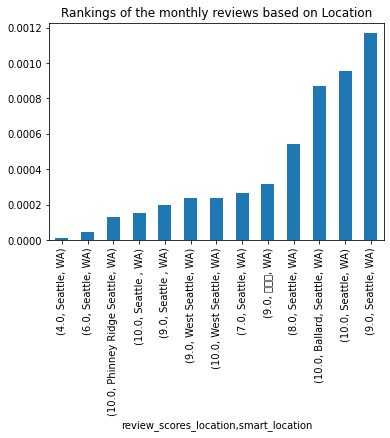

In [10]:
(review_responses/df_merge.shape[0]).plot(kind="bar");
plt.title("Rankings of the monthly reviews based on Location");

In [11]:
#Room visits - get the rooms collection above 200 reviews as the most visited
room_visits = df_merge.name.value_counts()
top_room_visits = room_visits[room_visits > 200]

#print the output of the data
print(top_room_visits)

contemporary art loft downtown [7]     474
contemporary art loft downtown [17]    466
Beautiful, Quiet, Friendly Ballard     404
Capitol Hill Suite + Free Parking      353
Guest Studio - North Capitol Hill      320
Charming Apt, VERY Central Location    319
Cozy Studio, min. to downtown -WiFi    297
Central Guest Room, Stunning View      294
U District Backyard Cottage & Loft     287
Volunteer Park Room 2                  279
1BR Cozy Apartment in Capitol Hill     278
Restful Room w/Bath in West Ballard    277
Guest House in Madison Valley          270
Great Space & Location + View!         265
Volunteer Park Room 1                  263
Spacious Apartment in Capitol Hill!    255
Cottage in the Heart of Ballard        244
Downtown Convention Ctr B&B - Nice!    240
N. Beacon Hill- Super Private Room     238
Charming Fremont Garden Cottage        233
Private studio cottage in Fremont      233
8, Sparkling Seattle Center            219
Teeny Tiny Guestyhouse!                210
Greenwood S

# Question 2
#### In what way did the reviews affect the revenue of the company?

In [12]:
#create a function to clean the currency field
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [27]:
#Create a subset of the rooms with their prices
df_price = df_merge[["date", "price", "reviews_per_month", "review_scores_rating"]]

#Get all the rows for the reviews per month that are not null
df_price = df_price[df_price['reviews_per_month'].notnull()].copy()

#clean the price field and return a float
df_price['price'] = df_price['price'].apply(clean_currency).astype('float')


#Remove duplicates where necessary and get the dataset where reviews per month is above 10
df_price.drop_duplicates(inplace=True)
top_room_price = df_price[df_price['reviews_per_month'] > 10].sort_values(by='price', ascending=False,)

#Get the mode
df_price_summary = df_price.groupby(pd.PeriodIndex(df_price['date'], freq="M"))['price'].sum().sort_values(ascending=False)
print(df_price_summary)

#Convert the Series to a dataframe
price_frame = df_price_summary.to_frame()

date
2015-08    901701.0
2015-09    761948.0
2015-07    739697.0
2015-06    617985.0
2015-10    589811.0
             ...   
2010-02       205.0
2009-09       184.0
2009-06       170.0
2009-08        99.0
2009-07        90.0
Freq: M, Name: price, Length: 79, dtype: float64


<AxesSubplot:xlabel='date'>

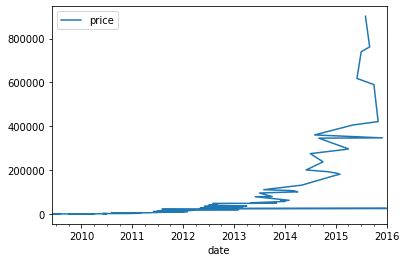

In [28]:
price_frame.plot(y = 'price')

### From the above plot between 2015 and 2016, there is reduction in the company's revenue. The company can out why there is decline through surveys and create targeted Ads that would draw more more customers to its services

# Question 3
#### What policy affected the choice of review on the site and in which was do they visitors respond to the reviews.

cancellation_policy
moderate    2688.04
strict      2408.60
flexible    1537.19
Name: reviews_per_month, dtype: float64


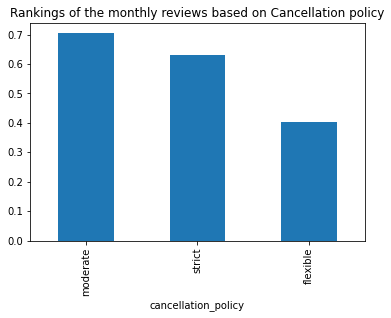

In [23]:
#Using the available categorical data, calculate the mean
listing_reviews = df_listings.groupby('cancellation_policy')['reviews_per_month'].sum().sort_values(ascending=False)
print(listing_reviews)


(listing_reviews/df_listings.shape[0]).plot(kind="bar");
plt.title("Rankings of the monthly reviews based on Cancellation policy");

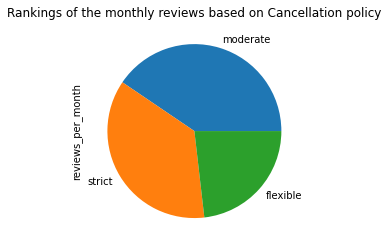

In [24]:
(listing_reviews/df_listings.shape[0]).plot(kind="pie");
plt.title("Rankings of the monthly reviews based on Cancellation policy");

### From the chart above, you can deduce that the moderate cancellation has the highest monthly review, implies that visitors are more interested in the moderate policy

In [28]:
#What is the average revenue derived from the reviews accross all the users
#clean the price field
df_merge['price'] = df_merge['price'].apply(clean_currency).astype('float')
total_rev = df_merge.groupby('reviewer_name')['price'].mean()
total_rev

reviewer_name
'Brielle           95.000000
(Leo) Dennis      175.000000
(email hidden)    133.636364
5012scf           150.000000
A                  77.500000
                     ...    
해진                 50.000000
현덕(Hyunduk)       130.000000
형선                 66.000000
혜리                105.000000
호철                 78.000000
Name: price, Length: 14380, dtype: float64